In [51]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# Creating custom legend handles
import matplotlib.lines as mlines
import sys
import os
import re
from tqdm import tqdm

def path_link(path:str):
    sys.path.append(path)

path_link('/master/code/lib')

import utils.stats as stats
import utils.testing_gen as gen
import utils.loading as load
import utils.nn_gen as nn_gen
from utils.tools import array2List

In [52]:
PATH = ['/master/code/last/finished_exps/gnn-1', '/master/code/last/finished_exps/gnn-2']

### Obtain the paths and the informations

In [55]:
class id():
    def __init__(self):
        self.nbLayer = None
        self.dropout = None
        self.layerNorm = None
        self.path = None
        self.loss = None
        self.eval_loss = None
        self.eval_sim_loss = None
        self.data_type = None


    def load_id(self, path:str):
        try:
            nb_layer_match = re.search(r'nbLyaer-(\d+)', path)
            dropout_match = re.search(r'dropout-(\d+)', path)
            layer_norm_match = re.search(r'layerNorm-(\d+)', path)

            self.nbLayer = int(nb_layer_match.group(1))
            self.dropout = int(dropout_match.group(1))
            self.layerNorm = int(layer_norm_match.group(1))

            if 'noisy' in path:
                self.data_type = 'noisy'

            elif 'normal' in path:
                self.data_type = 'normal'
            
            
            self.path = path

            self.loss = os.path.join(os.path.dirname(path), 'loss_list.npy')
            self.eval_loss = os.path.join(os.path.dirname(path), 'eval_list.npy')
            self.eval_sim_loss = os.path.join(os.path.dirname(path), 'eval_sim_list.npy')
        except:
            print(path)

    def label(self):
        return f'{self.data_type}_nbLayer-{self.nbLayer}_dropout{self.dropout}_layerNorm{self.layerNorm}'

In [56]:
def get_path_models(path):

    res = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('best.pt'):
                id_model = id()
                id_model.load_id(os.path.join(root, file))

                res.append(id_model)


    return res

In [57]:
res = []

for path in PATH:
    res.extend(get_path_models(path))

In [58]:
for r in res:
    print(f'{r.path} >>> {r.__dict__}')

/master/code/last/finished_exps/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/compex_best.pt >>> {'nbLayer': 1, 'dropout': 0, 'layerNorm': 0, 'path': '/master/code/last/finished_exps/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/compex_best.pt', 'loss': '/master/code/last/finished_exps/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/loss_list.npy', 'eval_loss': '/master/code/last/finished_exps/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/eval_list.npy', 'eval_sim_loss': '/master/code/last/finished_exps/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-0/model_trained/eval_sim_list.npy', 'data_type': 'noisy'}
/master/code/last/finished_exps/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerNorm-1/model_trained/compex_best.pt >>> {'nbLayer': 1, 'dropout': 0, 'layerNorm': 1, 'path': '/master/code/last/finished_exps/gnn-1/Alan1/mt_compex_noisy_nbLyaer-1_dropout-0_layerN

In [59]:
list_lost = [r.loss for r in res]
list_eval = [r.eval_loss for r in res]
list_sim = [r.eval_sim_loss for r in res]
labels = [r.label() for r in res]

### dropout

plt.bar(labels, min_loss)
plt.xticks(rotation=90)
plt.show()

32it [00:35,  1.09s/it]


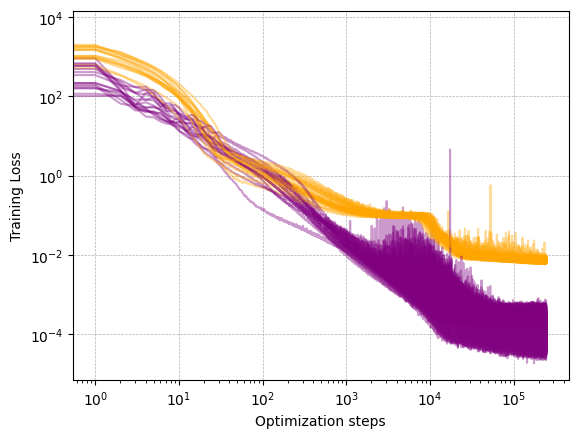

In [61]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_lost)):
    v = np.load(loss)
    plt.loglog(v, color = color[i], alpha = 0.4)

plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Optimization steps')
plt.ylabel('Training Loss')
plt.show()

32it [00:01, 28.46it/s]


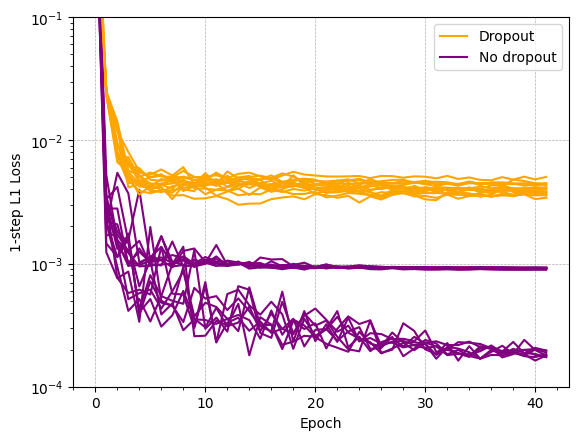

In [62]:
list_eval_loss = []
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_eval)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')
dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epoch')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.ylim([0.0001, 0.1])
plt.show()

32it [00:02, 15.46it/s]


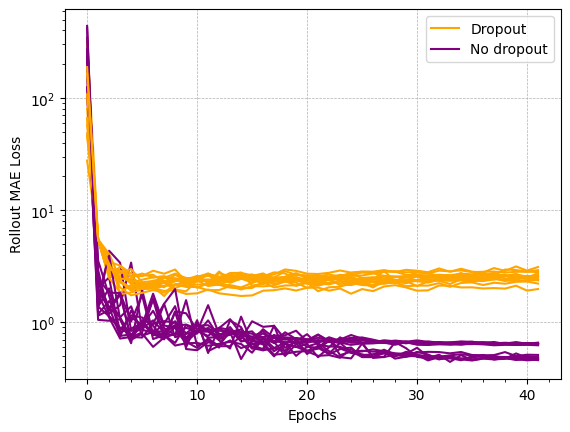

In [63]:
color = []
layerNorm = 0

for r in res:
    if r.dropout == 1:
        color.append('orange')
    else:
        color.append('purple')


for i, loss in tqdm(enumerate(list_sim)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = color[i])

plt.yscale('log')

dropout_line = mlines.Line2D([], [], color='orange', label='Dropout')
no_dropout_line = mlines.Line2D([], [], color='purple', label='No dropout')

plt.xlabel('Epochs')
plt.ylabel('Rollout MAE Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[dropout_line, no_dropout_line])
plt.show()

In [64]:
dropout_res= []

for i, r in enumerate(res):
    if r.dropout:
        dropout_res.append(r)


In [65]:
loss_dropouts = []

for r in dropout_res:
    loss_dropouts.append(r.loss)

100%|██████████| 16/16 [00:02<00:00,  7.15it/s]


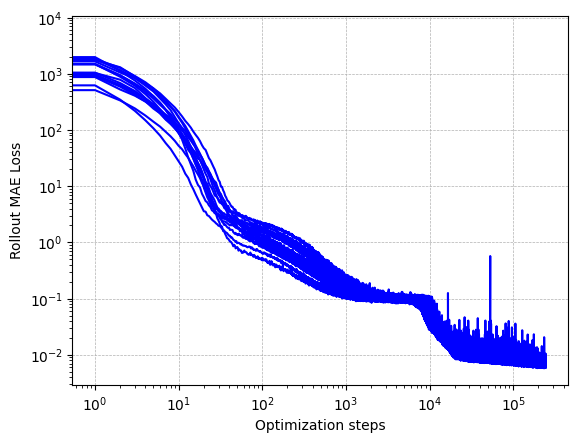

In [66]:
for loss in tqdm(loss_dropouts):
    v = np.load(loss)
    plt.loglog(v, color = 'b')

#plt.yscale('log')
plt.xlabel('Optimization steps')
plt.ylabel('Rollout MAE Loss')
#plt.minorticks_on()
plt.grid( linestyle='--', linewidth=0.5)
plt.show()

100%|██████████| 32/32 [00:00<00:00, 40.32it/s]


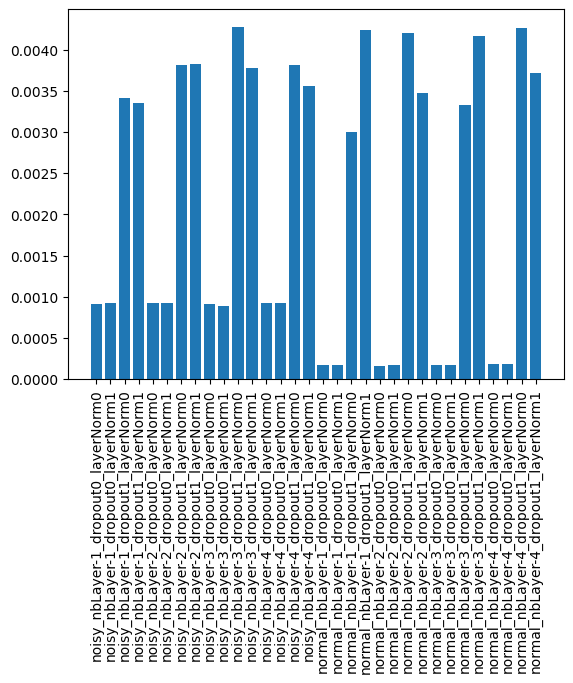

In [67]:
min_eval = []
for eval_vals in tqdm(list_eval):
    v = np.load(eval_vals)
    min_eval.append(np.min(v))

plt.bar(labels, min_eval)
plt.xticks(rotation=90)
plt.show()

### Filter

In [68]:
runs_normal=[]
runs_noisy=[]
res_no_drop = []
name_normal = []
name_noisy = []

for i, r in enumerate(res):
    if not r.dropout:
        res_no_drop.append(r)

for i, r in enumerate(res_no_drop):
    if r.data_type == 'noisy':
        runs_noisy.append(r)
    elif r.data_type == 'normal':
        runs_normal.append(r)


list_lost_normal = [r.loss for r in runs_normal]
list_eval_normal = [r.eval_loss for r in runs_normal]
list_sim_normal = [r.eval_sim_loss for r in runs_normal]
labels_normal = [r.label() for r in runs_normal]


list_lost_noisy = [r.loss for r in runs_noisy]
list_eval_noisy = [r.eval_loss for r in runs_noisy]
list_sim_noisy = [r.eval_sim_loss for r in runs_noisy]
labels_noisy = [r.label() for r in runs_noisy]


name_normal = [f'{r.nbLayer} layer' for r in runs_normal]
name_noisy = [f'{r.nbLayer} layer' for r in runs_noisy]

In [69]:
print([r.dropout for r in runs_normal])
print([r.nbLayer for r in runs_normal])
print([r.label() for r in runs_noisy])

[0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 2, 2, 3, 3, 4, 4]
['noisy_nbLayer-1_dropout0_layerNorm0', 'noisy_nbLayer-1_dropout0_layerNorm1', 'noisy_nbLayer-2_dropout0_layerNorm0', 'noisy_nbLayer-2_dropout0_layerNorm1', 'noisy_nbLayer-3_dropout0_layerNorm0', 'noisy_nbLayer-3_dropout0_layerNorm1', 'noisy_nbLayer-4_dropout0_layerNorm0', 'noisy_nbLayer-4_dropout0_layerNorm1']


In [70]:
colors_normal = []

for i, r in enumerate(runs_normal):
    if r.nbLayer == 1:
        colors_normal.append('red')
    elif r.nbLayer == 2:
        colors_normal.append('orange')
    elif r.nbLayer == 3:
        colors_normal.append('green')
    elif r.nbLayer == 4:
        colors_normal.append('blue')

In [71]:
colors_noisy = []

for i, r in enumerate(runs_noisy):
    if r.nbLayer == 1:
        colors_noisy.append('red')
    elif r.nbLayer == 2:
        colors_noisy.append('orange')
    elif r.nbLayer == 3:
        colors_noisy.append('green')
    elif r.nbLayer == 4:
        colors_noisy.append('blue')

8it [00:01,  5.53it/s]


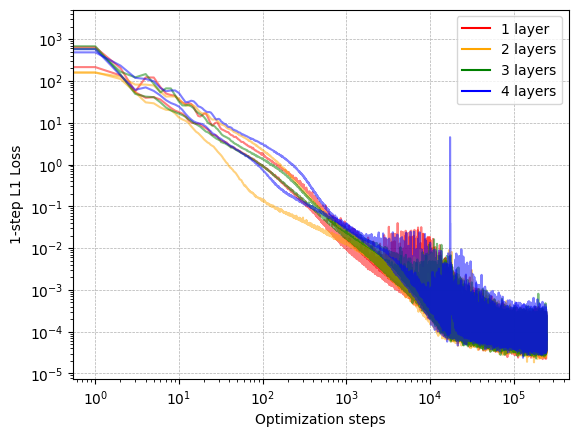

In [72]:
for i, loss in tqdm(enumerate(list_lost_normal)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.loglog(v, color = colors_normal[i], alpha = 0.5)

one_layer_line = mlines.Line2D([], [], color='red', label='1 layer')
two_layer_line = mlines.Line2D([], [], color='orange', label='2 layers')
three_layer_line = mlines.Line2D([], [], color='green', label='3 layers')
four_layer_line = mlines.Line2D([], [], color='blue', label='4 layers')

plt.xlabel('Optimization steps')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[one_layer_line, two_layer_line, three_layer_line, four_layer_line])
plt.show()

8it [00:01,  6.90it/s]


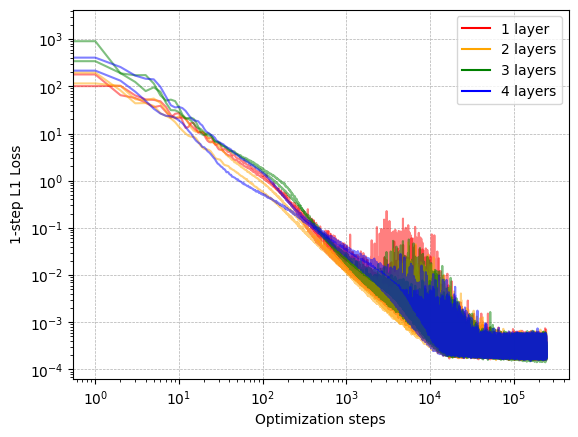

In [73]:
for i, loss in tqdm(enumerate(list_lost_noisy)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.loglog(v, color = colors_noisy[i], alpha = 0.5)

one_layer_line = mlines.Line2D([], [], color='red', label='1 layer')
two_layer_line = mlines.Line2D([], [], color='orange', label='2 layers')
three_layer_line = mlines.Line2D([], [], color='green', label='3 layers')
four_layer_line = mlines.Line2D([], [], color='blue', label='4 layers')

plt.xlabel('Optimization steps')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[one_layer_line, two_layer_line, three_layer_line, four_layer_line])
plt.show()

8it [00:00, 27.02it/s]


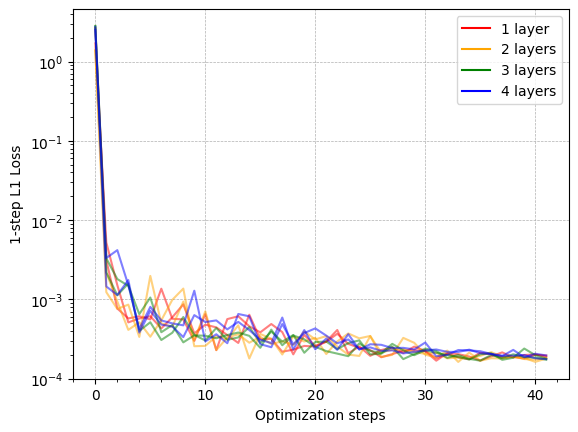

In [74]:
for i, loss in tqdm(enumerate(list_eval_normal)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = colors_normal[i], alpha = 0.5)

plt.yscale('log')
one_layer_line = mlines.Line2D([], [], color='red', label='1 layer')
two_layer_line = mlines.Line2D([], [], color='orange', label='2 layers')
three_layer_line = mlines.Line2D([], [], color='green', label='3 layers')
four_layer_line = mlines.Line2D([], [], color='blue', label='4 layers')

plt.xlabel('Optimization steps')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[one_layer_line, two_layer_line, three_layer_line, four_layer_line])
plt.show()

8it [00:00, 17.38it/s]


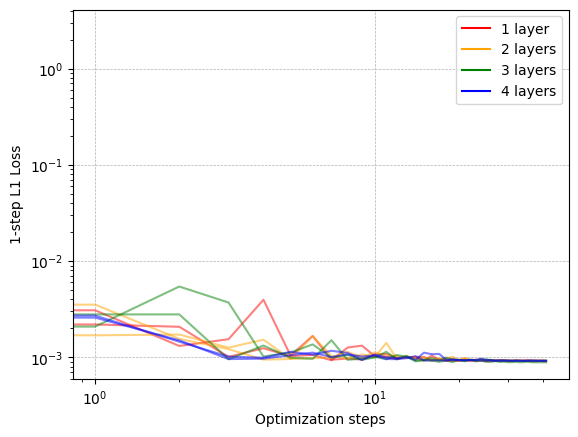

In [75]:
for i, loss in tqdm(enumerate(list_eval_noisy)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.loglog(v, color = colors_noisy[i], alpha = 0.5)

#plt.yscale('log')
one_layer_line = mlines.Line2D([], [], color='red', label='1 layer')
two_layer_line = mlines.Line2D([], [], color='orange', label='2 layers')
three_layer_line = mlines.Line2D([], [], color='green', label='3 layers')
four_layer_line = mlines.Line2D([], [], color='blue', label='4 layers')

plt.xlabel('Optimization steps')
plt.ylabel('1-step L1 Loss')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[one_layer_line, two_layer_line, three_layer_line, four_layer_line])
plt.show()

8it [00:00, 51.53it/s]


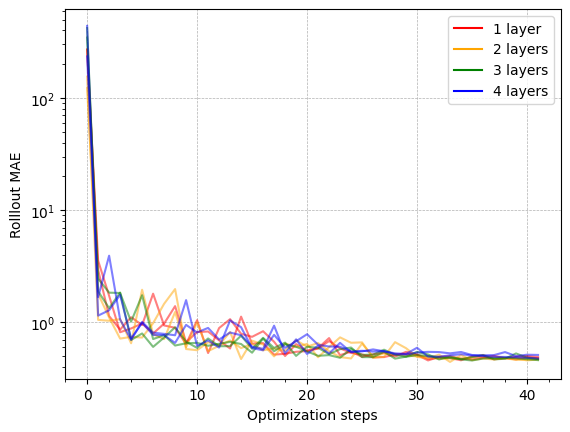

In [80]:
for i, loss in tqdm(enumerate(list_sim_normal)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = colors_normal[i], alpha = 0.5)

plt.yscale('log')
one_layer_line = mlines.Line2D([], [], color='red', label='1 layer')
two_layer_line = mlines.Line2D([], [], color='orange', label='2 layers')
three_layer_line = mlines.Line2D([], [], color='green', label='3 layers')
four_layer_line = mlines.Line2D([], [], color='blue', label='4 layers')

plt.xlabel('Optimization steps')
plt.ylabel('Rolllout MAE')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[one_layer_line, two_layer_line, three_layer_line, four_layer_line])
plt.show()

8it [00:01,  7.94it/s]


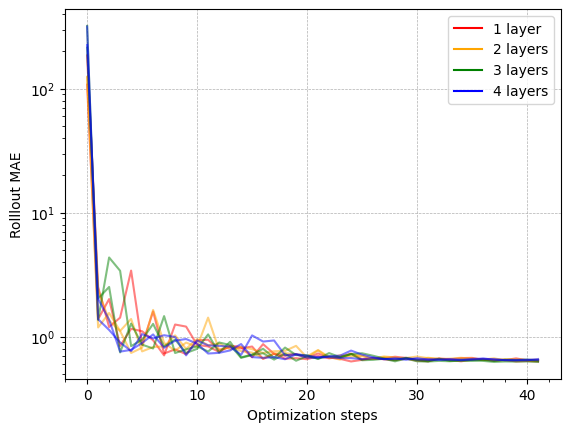

In [81]:
for i, loss in tqdm(enumerate(list_sim_noisy)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    plt.plot(v, color = colors_noisy[i], alpha = 0.5)

plt.yscale('log')
one_layer_line = mlines.Line2D([], [], color='red', label='1 layer')
two_layer_line = mlines.Line2D([], [], color='orange', label='2 layers')
three_layer_line = mlines.Line2D([], [], color='green', label='3 layers')
four_layer_line = mlines.Line2D([], [], color='blue', label='4 layers')

plt.xlabel('Optimization steps')
plt.ylabel('Rolllout MAE')
plt.minorticks_on()
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(handles=[one_layer_line, two_layer_line, three_layer_line, four_layer_line])
plt.show()

8it [00:00, 60.51it/s]


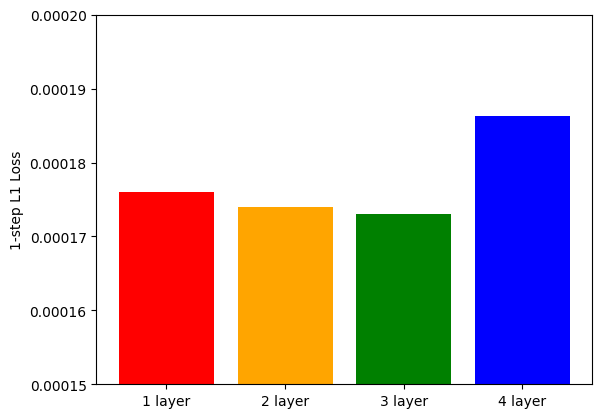

GERER LES LAYER NORMS


In [78]:
min_vals = []

for i, loss in tqdm(enumerate(list_eval_normal)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    min_vals.append(np.min(v))

one_layer_line = mlines.Line2D([], [], color='red', label='1 layer')
two_layer_line = mlines.Line2D([], [], color='orange', label='2 layers')
three_layer_line = mlines.Line2D([], [], color='green', label='3 layers')
four_layer_line = mlines.Line2D([], [], color='blue', label='4 layers')


plt.bar(name_normal, min_vals, color = colors_normal)
plt.ylabel('1-step L1 Loss')
plt.ylim([0.00015, 0.0002])
plt.show()

print('GERER LES LAYER NORMS')

8it [00:00, 62.67it/s]


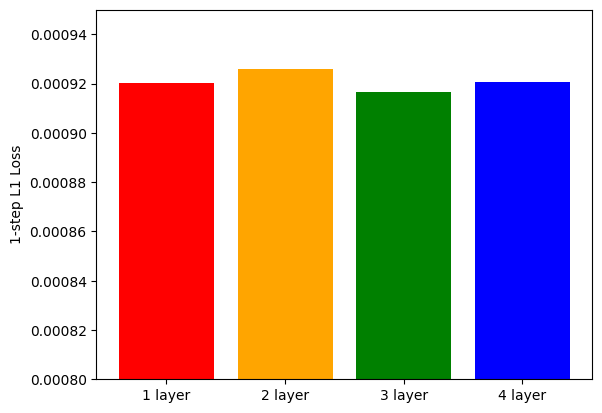

GERER LES LAYER NORMS


In [79]:
min_vals = []

for i, loss in tqdm(enumerate(list_eval_noisy)):
    v = np.load(loss)
    #plt.loglog(v, color = color[i])
    min_vals.append(np.min(v))

one_layer_line = mlines.Line2D([], [], color='red', label='1 layer')
two_layer_line = mlines.Line2D([], [], color='orange', label='2 layers')
three_layer_line = mlines.Line2D([], [], color='green', label='3 layers')
four_layer_line = mlines.Line2D([], [], color='blue', label='4 layers')


plt.bar(name_noisy, min_vals, color = colors_noisy)
plt.ylabel('1-step L1 Loss')
plt.ylim([0.0008, 0.00095])
plt.show()

print('GERER LES LAYER NORMS')